In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Rating de filmes

In [2]:
ratings = pd.read_csv('dados/ratings.csv')

In [3]:
ratings.columns = ["usuario", "filme", "nota", "data"]

In [4]:
ratings.head(10)

,usuario,filme,nota,data
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [5]:
ratings['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
ratings['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

<AxesSubplot:ylabel='Frequency'>

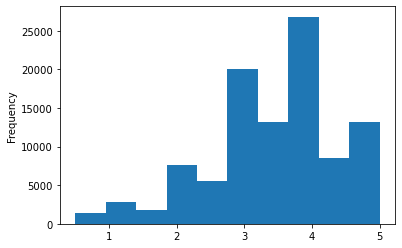

In [7]:
ratings['nota'].plot(kind='hist')

In [8]:
ratings['nota'].median()

3.5

In [9]:
ratings['nota'].mean()

3.501556983616962

In [10]:
ratings['nota'].mode()

0    4.0
dtype: float64

In [11]:
print('Assimetria à esquerda')

Assimetria à esquerda


In [12]:
ratings['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<AxesSubplot:>

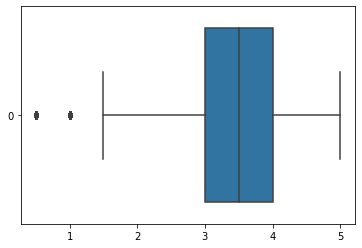

In [13]:
sns.boxplot(data=ratings.nota, orient="h")

In [14]:
movies = pd.read_csv('dados/movies.csv')

In [15]:
movies.columns = ["filme", "titulo", "generos"]

In [16]:
movies.head()

,filme,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Análise Exploratória do Rating dos Filmes

In [17]:
ratings.query('filme==1').nota.mean()

3.9209302325581397

In [18]:
medias_por_filme = ratings.groupby('filme').nota.mean()

In [19]:
medias_por_filme.head()

filme
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

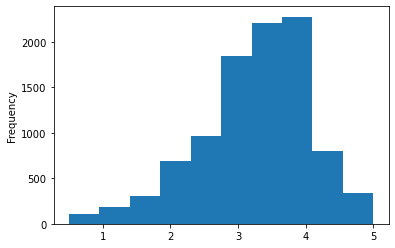

In [20]:
medias_por_filme.plot(kind='hist')

<AxesSubplot:xlabel='nota'>

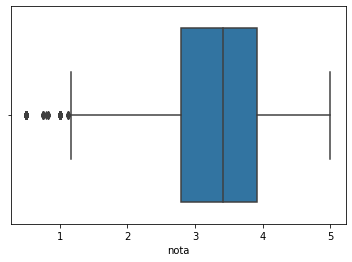

In [21]:
sns.boxplot(x=medias_por_filme)

In [22]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

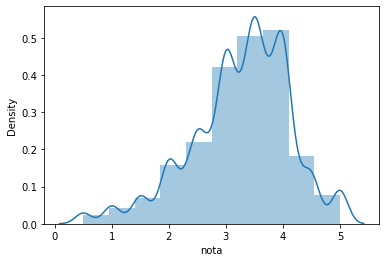

In [23]:
sns.distplot(medias_por_filme, bins=10)

/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

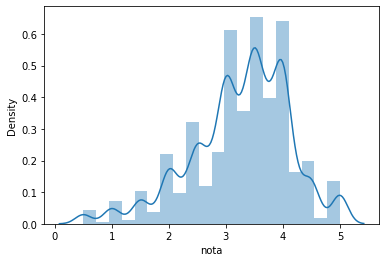

In [24]:
sns.distplot(medias_por_filme, bins=20)

/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

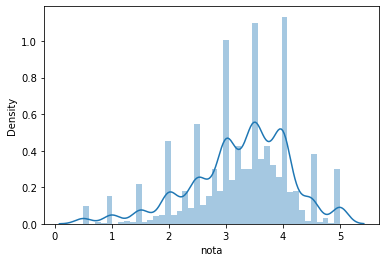

In [25]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma da média dos filmes')

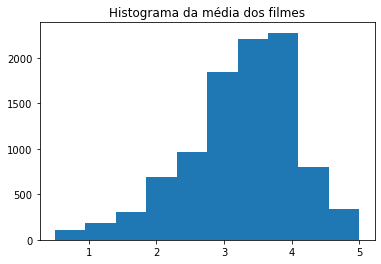

In [26]:
plt.hist(medias_por_filme)
plt.title('Histograma da média dos filmes')

## Medidas centrais do TOP 2

In [27]:
ratings_toy_story = ratings.query('filme==1')
ratings_jumanji = ratings.query('filme==2')

In [28]:
ratings_toy_story['nota'].count()

215

In [29]:
ratings_jumanji['nota'].count()

110

/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

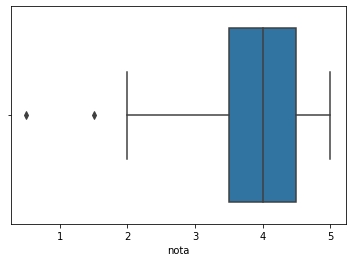

In [31]:
sns.boxplot(ratings_toy_story['nota'])

/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

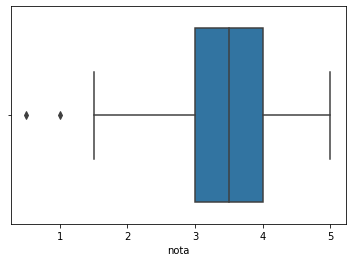

In [32]:
sns.boxplot(ratings_jumanji['nota'])

<AxesSubplot:xlabel='filme', ylabel='nota'>

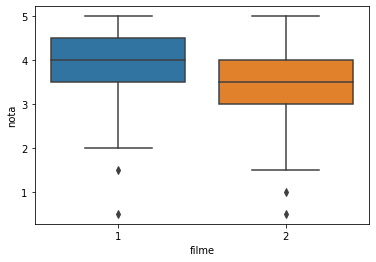

In [40]:
sns.boxplot(x="filme", y="nota", data=ratings.query("filme in [1, 2]"))

In [38]:
print(f"Mediana do Toy Story {np.median(ratings_toy_story['nota'])}")
print(f"Mediana do Jumanji {np.median(ratings_jumanji['nota'])}")

Mediana do Toy Story 4.0
Mediana do Jumanji 3.5


In [39]:
print(f"Média do Toy Story {np.mean(ratings_toy_story['nota'])}")
print(f"Média do Jumanji {np.mean(ratings_jumanji['nota'])}")

Média do Toy Story 3.9209302325581397
Média do Jumanji 3.4318181818181817


### Dispersão

In [37]:
print(f"Desvio padrão do Toy Story {np.std(ratings_toy_story['nota'])}")
print(f"Desvio padrão do Jumanji {np.std(ratings_jumanji['nota'])}")

Desvio padrão do Toy Story 0.8329153449641146
Desvio padrão do Jumanji 0.8776965532969931
